## Naive Introduction to Gradient Descent

In [43]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Gradient Descent
Consider the function $J(\boldsymbol{w})=J(w_0, w_1) =-e^{-\frac{1}{100}(w_1^2 + w_2^2 -w_1w_2 - 2w_1  + 4w_2 + 5)} - 2 e^{-(w_1^2  + w_2^2  - 4w_1- 9 w_2 + 25)}.$

i\. Let's plot $J(\boldsymbol{w})$ as a function of $\boldsymbol{w}$ using contour plot.

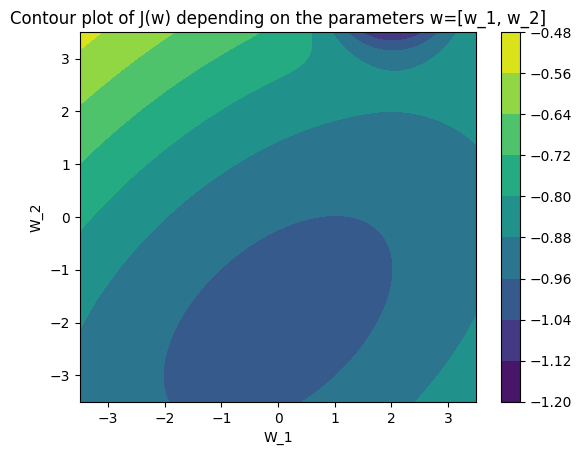

In [44]:
# Define function J(w)
def J(*args):
    ''' J(w)
    :param args: Either an array of numbers of len 2 or 2 single numbers
    :return: J(w) as defined above
    '''
    assert 0 < len(args) <= 2

    if len(args) == 1:
        w_1 = args[0][0]
        w_2 = args[0][1]
    else:
        w_1 = args[0]
        w_2 = args[1]

    return -np.exp(-0.01*(w_1**2 + w_2**2 -w_1*w_2 - 2*w_1 + 4*w_2 + 5)) - 2*np.exp(-1*(w_1**2 + w_2**2 - 4*w_1 - 9*w_2 + 25))

# Prepare contours plot of J(w)
xlist = np.linspace(-3.5, 3.5, 100)
ylist = np.linspace(-3.5, 3.5, 100)
X, Y = np.meshgrid(xlist, ylist)

J_vect = np.vectorize(J)
Z = J_vect(X, Y)

fig,ax=plt.subplots(1,1)
cs = ax.contourf(X,Y,Z)
fig.colorbar(cs)
ax.set_xlabel('W_1')
ax.set_ylabel('W_2')
ax.set_title('Contour plot of J(w) depending on the parameters w=[w_1, w_2]')
plt.show()

ii\. For the Gradient Descent algorithm we need the gradient of the objective function.
            
  $Gradient:   \nabla J(\boldsymbol{w}) = \left(
  \begin{array}{c}
    \frac{\partial J(\boldsymbol{w})}{\partial w_1} \\ %
    \frac{\partial J(\boldsymbol{w})}{\partial w_2}
  \end{array} \right)
$

In [45]:
# Define function gradient_J(w)
def dJ(*args):
    ''' J(w)
    :param args: Either an array of numbers of len 2 or 2 single numbers
    :return: deltaJ(w) as defined above
    '''
    assert 0 < len(args) <= 2

    if len(args) == 1:
        w_1 = args[0][0]
        w_2 = args[0][1]
    else:
        w_1 = args[0]
        w_2 = args[1]

    dJdw_1 = 0.01 * (2*w_1 - w_2 -2) * np.exp(-0.01*(w_1**2 + w_2**2 -w_1*w_2 - 2*w_1 + 4*w_2 + 5)) + \
             4 * (w_1-2) * np.exp(-1*(w_1**2 + w_2**2 - 4*w_1 - 9*w_2 + 25))

    dJdw_2 = 0.01 * (2*w_2 - w_1 + 4) * np.exp(-0.01*(w_1**2 + w_2**2 -w_1*w_2 - 2*w_1 + 4*w_2 + 5)) + \
             2 * (2*w_2 - 9) * np.exp(-1*(w_1**2 + w_2**2 - 4*w_1 - 9*w_2 + 25))

    return np.reshape([dJdw_1, dJdw_2], (2,1))

iii\. Now, we can implement a naive Gradient Descent algorithm. We will plot the location of the new $\boldsymbol{w}$ after each iteration on the contour plot.

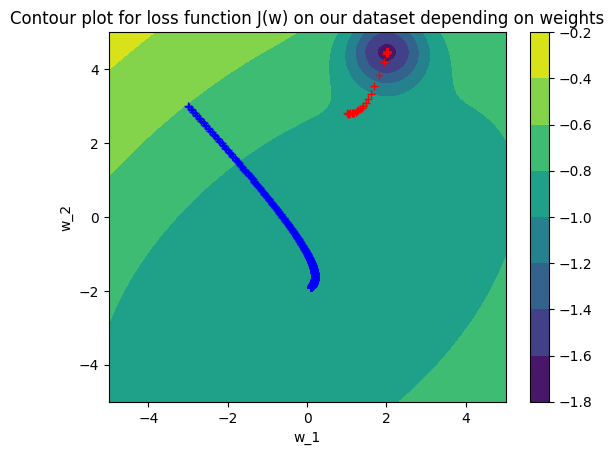

In [46]:
# Define the gradient descent algorithm as function
def GD(eta, w_init, epoch):
    '''
    Applies given number of iterations of Gradient Descent.
    :param eta: Learning rate e.g. step size
    :param w_init: Initial parameters
    :param epoch: Number of iterations
    :return: A list of all updates of the parameters w
    '''
    w_track = [w_init]
    w = w_init
    for i in range(epoch):
        new_w = w - eta * dJ(w)
        w_track.append(new_w)
        w = new_w

    return np.reshape(w_track, (epoch+1, 2))

# Train w
w_path_1 = GD(0.5, np.reshape([-3, 3], (2,1)), 500)
w_path_2 = GD(0.5, np.reshape([1, 2.8], (2,1)), 500)

# Prepare contour plot and mark each weight update on the plot.
xlist = np.linspace(-5, 5, 100)
ylist = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(xlist, ylist)

J_vect = np.vectorize(J)
Z = J_vect(X, Y)

fig,ax=plt.subplots(1,1)
cs = ax.contourf(X,Y,Z)
ax.set_title(f'Contour plot for loss function J(w) on our dataset depending on weights')
ax.set_ylabel('w_2')
ax.set_xlabel('w_1')
fig.colorbar(cs)
plt.plot(w_path_1[:,:1], w_path_1[:,1:2], 'b+')
plt.plot(w_path_2[:,:1], w_path_2[:,1:2], 'r+')
plt.show()

Nicely to see: We can end up in local minima! Initialization matters for non-convex functions!

### 3.3 Programming Task: Housing Price Regression Problem
Let's take a non artificial example.

The file __house\_prices.txt__ contains a data set of house prices: the
first column is the house size in square feet, the second column is the number
of bedrooms, the third column is the price in USD.


i\. Plot house prices vs. house sizes as a scatter plot.

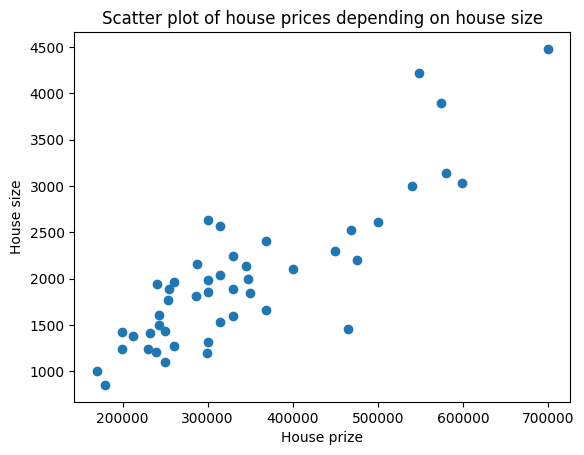

In [47]:
#Read and prepare scatter plot
data = np.loadtxt('../datasets/house_prices.txt', delimiter=',')

sizes = data[:,0]
bedrooms = data[:,1]
prices = data[:,2]

plt.scatter(prices, sizes)
plt.title('Scatter plot of house prices depending on house size')
plt.xlabel('House prize')
plt.ylabel('House size')
plt.show()

ii\. Next, we fit linear regression to these data points using Gradient Descent. Hence, we have to implement an objective function and it's derivative again.

* Consider the linear model $h_{\boldsymbol{w}}(\boldsymbol{x})=w_0 x_0 + w_1 x_1={\boldsymbol{w}}^\top\boldsymbol{x}$,
    where $x_1$ is the house size and $x_0=1$ by convention, $\boldsymbol{x}={[x_0,x_1]}^\top$,
    and $\boldsymbol{w}={[w_0, w_1]}^\top$. Let's define the cost function on the dataset:
 
    $J(\boldsymbol{w})=\frac{1}{2}\sum_{i=1}^{n} \left(h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)})-y^{(i)}\right)^2.$

 
    Above, $n$ is the number of rows in __house_prices.txt__, $y^{(i)}$ is the house price, and $x_1^{(i)}$ is the house size.
     $h_{\boldsymbol{w}}(\cdot)$ represents the linear regression model. Again, we will plot $J(\boldsymbol{w})$ as a function of $\boldsymbol{w}$ using the contour plot. We rescale the values for better visualization.

     Note that we omit the feature *number of bedrooms* on purpose for better visualization.

In [48]:
# Define X, Y && normalize
X = np.zeros((len(data), 2))
X[:, 0] = np.ones_like(X[:,0])
X[:, 1] = (sizes - np.min(sizes)) / (np.max(sizes) - np.min(sizes))
Y = ((prices - np.min(prices)) / (np.max(prices) - np.min(prices))).reshape(-1,1)

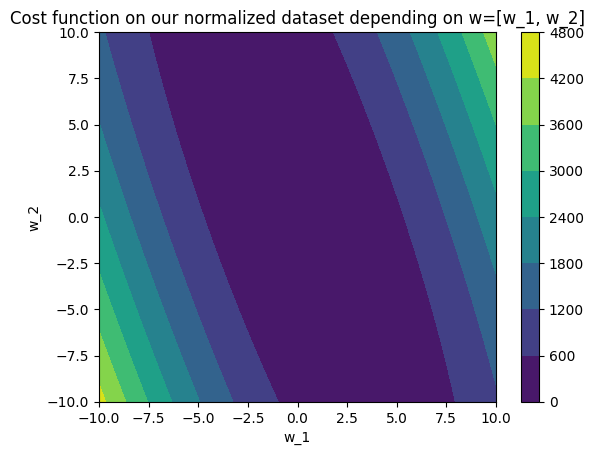

In [49]:
# Define function J(w)
def J(*args):
    ''' J(w)
    :param args: Either an array of numbers of len 2 or 2 single numbers
    :return: J(w) as defined above
    '''
    assert 0 < len(args) <= 2

    if len(args) == 1:
        w=args[0]
    else:
        w = np.reshape([args[0], args[1]], (2,1))
    return 0.5 * np.sum([((w.T @ x) - y)**2 for x,y in zip(X,Y)])

# Define function gradient_J(w)
def dJ(*args):
    ''' J(w)
    :param args: Either an array of numbers of len 2 or 2 single numbers
    :return: deltaJ(w) as defined above
    '''
    assert 0 < len(args) <= 2

    if len(args) == 1:
        w=args[0]
    else:
        w = np.reshape([args[0], args[1]], (2,1))
    dJdw_0 = np.sum([((w.T @ x) - y)*x[0] for x,y in zip(X,Y)])
    dJdw_1 = np.sum([((w.T @ x) - y)*x[1] for x,y in zip(X,Y)])

    return np.reshape([dJdw_0, dJdw_1], (2,1))


# Plot the cost function J(w)
xlist = np.linspace(-10.0, 10.0, 100)
ylist = np.linspace(-10.0, 10.0, 100)
W_1, W_2 = np.meshgrid(xlist, ylist)

J_vect = np.vectorize(J)
Z = J_vect(W_1, W_2)

fig, ax=plt.subplots(1,1)
cs = ax.contourf(W_1,W_2,Z)
ax.set_title('Cost function on our normalized dataset depending on w=[w_1, w_2]')
ax.set_xlabel('w_1')
ax.set_ylabel('w_2')
fig.colorbar(cs)
plt.show()

* Let's start with some initial value $\boldsymbol{w}$
and run the steps of the gradient descent algorithm. Again, we plot the location of each new $\boldsymbol{w}$ on
the contour plot.

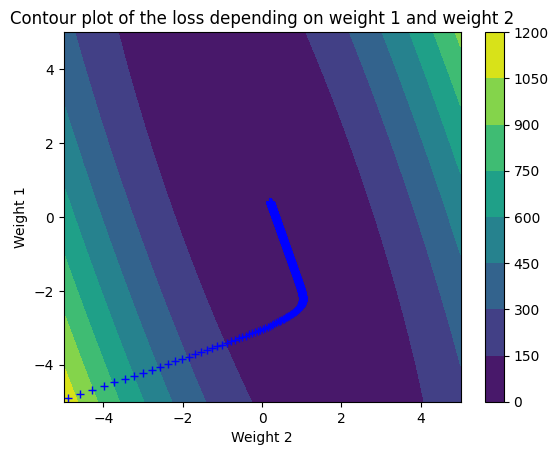

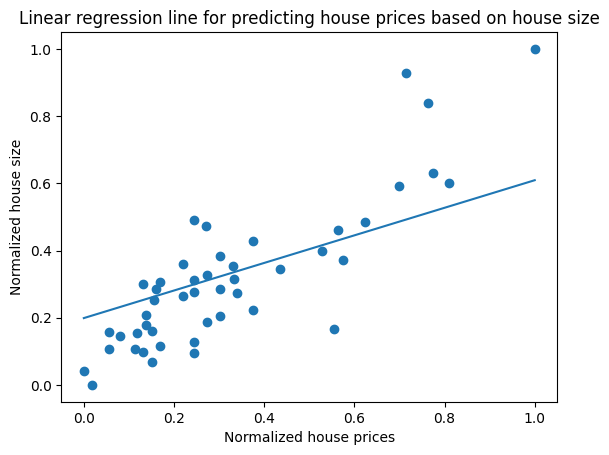

In [50]:
# Train w
w_path = GD(0.001, np.reshape([-4.9,-4.9], (2,1)), 1000)

xlist = np.linspace(-5.0, 5.0, 100)
ylist = np.linspace(-5.0, 5.0, 100)
W_1, W_2 = np.meshgrid(xlist, ylist)

J_vect = np.vectorize(J)
Z = J_vect(W_1, W_2)

# Prepare contour plot and mark each weight update on the plot.
fig, ax=plt.subplots(1,1)
ax.set_title('Contour plot of the loss depending on weight 1 and weight 2')
ax.set_ylabel('Weight 1')
ax.set_xlabel('Weight 2')
cs = ax.contourf(W_1,W_2,Z)
fig.colorbar(cs)
plt.plot(w_path[:,:1], w_path[:,1:2], 'b+')
plt.show()

# Plot the resulting linear regression function
plt.scatter(Y, X[:,1])
plt.title('Linear regression line for predicting house prices based on house size')
plt.xlabel('Normalized house prices')
plt.ylabel('Normalized house size')
plt.plot([0, 1], [w_path[-1][0] + i*w_path[-1][1] for i in [0,1]])
plt.show()

* Experiments by making changes to the learning rate of the gradient descent
algorithm:

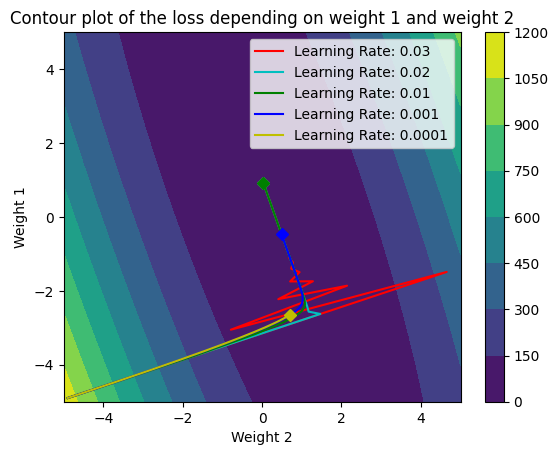

In [51]:
# TODO: Define alphas (learning rates) to test.
eta = [0.03, 0.02, 0.01, 0.001, 0.0001]
colors = ['r', 'c', 'g', 'b', 'y', 'w']
epochs = 500

w_paths = []
for lr in eta:
    w_path = GD(lr, np.reshape([-4.9,-4.9], (2,1)), epochs)
    w_paths.append(w_path)

# Repeat experiment for each alpha and observe the contour plot in each case.
Z = J_vect(W_1, W_2)

# Prepare contour plot and mark each weight update on the plot.
fig, ax=plt.subplots(1,1)
ax.set_title('Contour plot of the loss depending on weight 1 and weight 2')
ax.set_ylabel('Weight 1')
ax.set_xlabel('Weight 2')
cs = ax.contourf(W_1,W_2,Z)
fig.colorbar(cs)
for i in range(len(eta)):
    plt.plot(w_paths[i][:,:1], w_paths[i][:,1:2], colors[i], label=f'Learning Rate: {str(eta[i])}')
    plt.plot(w_paths[i][:,:1][-1], w_paths[i][:,1:2][-1], colors[i] + 'D')
plt.legend()
plt.show()

iii\. To varify that our algorithm works correct we can determine the weights of the model using the closed form solution for $\boldsymbol{w}$:
\begin{align}
    \hat{\mathbf{w}} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^Ty
\end{align}
Above, $\mathbf{y} = [y^{(1)},..., y^{(n)}]^T$ and $\mathbf{X}$ is the data matrix whose rows are $x^{(i)}$. Is this the same point that we have found above using gradient descent?

In [52]:
# Compute the closed form solution
w_star = np.linalg.inv(X.T @ X) @ X.T @ Y

print(f'Closed form solution leads to final weight vector: {w_star.ravel()}')
print(f'Gradient descent with learning rate {eta[0]}, number of epochs{500} leads to final weight vector: {w_paths[0][-1]}')
print(f'Gradient descent with learning rate {eta[1]}, number of epochs{500} leads to final weight vector: {w_paths[1][-1]}')
print(f'Gradient descent with learning rate {eta[2]}, number of epochs{500} leads to final weight vector: {w_paths[2][-1]}')
print(f'Gradient descent with learning rate {eta[3]}, number of epochs{500} leads to final weight vector: {w_paths[3][-1]}')
print(f'Gradient descent with learning rate {eta[4]}, number of epochs{500} leads to final weight vector: {w_paths[4][-1]}')

Closed form solution leads to final weight vector: [0.03016234 0.92035603]
Gradient descent with learning rate 0.03, number of epochs500 leads to final weight vector: [0.03016234 0.92035603]
Gradient descent with learning rate 0.02, number of epochs500 leads to final weight vector: [0.03016234 0.92035602]
Gradient descent with learning rate 0.01, number of epochs500 leads to final weight vector: [0.0302136 0.9202011]
Gradient descent with learning rate 0.001, number of epochs500 leads to final weight vector: [ 0.48929804 -0.46730863]
Gradient descent with learning rate 0.0001, number of epochs500 leads to final weight vector: [ 0.70299617 -2.64746292]


For an appropriate learning rate we find the same w* via the closed form solution and the gradient descent (GD) solution.
If we would have chosen more epochs, we would probably also find the same w* for smaller learning rates. However, the chosen epoch and learning rates shows nicely the behaviour of different learning rates. E.g. choosing it too small can end up in not reaching w*, too large causes oscillations.